# Build Simple Mushroom Classifier

Load Images for 100 Taxa with 100 Images Each

In [ ]:
from pathlib import Path
from fastai.vision.all import *
MO_URL = "https://images.mushroomobserver.org/3_2023-08-11-215845.tgz"
path = untar_data(MO_URL)
fnames = get_image_files(path)

def label_func(x):
    dirname = x.parent.name
    return dirname

dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

Show Me Some Mushrooms

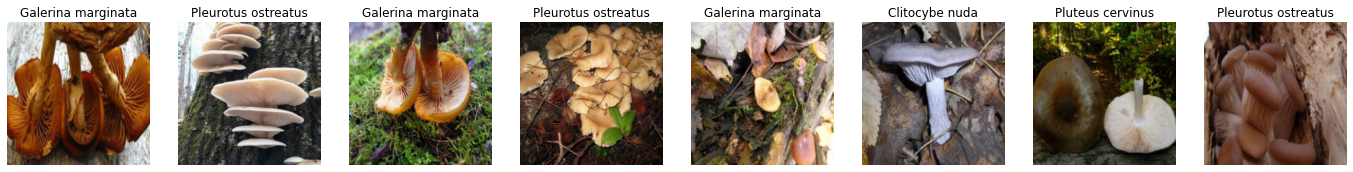

In [ ]:
dls.valid.show_batch(max_n=8, nrows=1)

Show Me Some Names

In [ ]:
dls.vocab

['Amanita amerirubescens', 'Amanita lavendula', 'Amanita pantherina', 'Clitocybe nuda', 'Galerina marginata', 'Phaeolus schweinitzii', 'Pleurotus ostreatus', 'Pluteus cervinus', 'Russula xerampelina', 'Trametes versicolor']

(Re)run Training - Run this cell to start over with the current image set

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(11)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 200MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,3.831195,3.228329,0.653314,37:41


epoch,train_loss,valid_loss,error_rate,time
0,2.899697,2.402629,0.529049,39:19
1,2.732330,2.236400,0.507020,39:23
2,2.631133,2.166790,0.495883,39:34
3,2.474552,2.046963,0.472713,39:37
4,2.287616,1.897228,0.443580,39:29
5,2.110438,1.782404,0.418991,39:48
6,1.941553,1.653755,0.393416,39:40
7,1.729891,1.548405,0.371375,39:45


epoch,train_loss,valid_loss,error_rate,time
0,2.899697,2.402629,0.529049,39:19
1,2.732330,2.236400,0.507020,39:23
2,2.631133,2.166790,0.495883,39:34
3,2.474552,2.046963,0.472713,39:37
4,2.287616,1.897228,0.443580,39:29
5,2.110438,1.782404,0.418991,39:48
6,1.941553,1.653755,0.393416,39:40
7,1.729891,1.548405,0.371375,39:45
8,1.545918,1.480304,0.357158,40:09
9,1.434409,1.440596,0.347429,40:22


Look for Confusion

In [1]:
interp = ClassificationInterpretation.from_learner(learn)
# interp.most_confused()

NameError: ignored

In [2]:
# interp.plot_confusion_matrix(figsize=(10, 10))

In [4]:
# interp.plot_top_losses(30, nrows=10, figsize=(30, 30))

In [5]:
# from fastai.vision.widgets import *
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [6]:
# for idx in cleaner.delete(): print(f"https://mushroomobserver.org/image/show_image/{str(cleaner.fns[idx]).split('/')[-1].split('.')[0]}")

Save the Model

In [7]:
# model_name = "latest-model"
# model_path = learn.save(model_name)

Reload and Verify the Model

In [8]:
# learn.load(model_name)
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_top_losses(30, nrows=10, figsize=(30, 30))

In [9]:
# Copy saved movel to Google Drive so it can be saved and potentially downloaded and used elsewhere
# from google.colab import drive
# drive.mount('/content/drive')
# !cp $model_path /content/drive/MyDrive

In [10]:
# import os

# download_images("tmp", urls=["https://images.mushroomobserver.org/orig/1400576.jpg"])
# os.listdir("tmp")
# path = Path("tmp", os.listdir("tmp")[0])
# learn.predict(path)